## Übung zu Kapitel 6

In dieser Übung wollen wir das Clustering vertiefen. Das Ziel ist es, die Parameterauswahl und die Interpretation der Cluster bei hochdimensionalen Daten zu üben. Die Interpretation ist auch die größte Schwierigkeit dieser Übung.
Als Daten verwenden wir die Bostondaten. Hier noch ein paar Tipps vorweg:

- Denken Sie an die Wertebereiche der Merkmale. Diese könnten einen Einfluss auf die Ergebnisse haben.
- Durch die Dimensionalität ist es schwierig, die Cluster zu interpretieren. Setzen Sie die PCA und paarweise Scatterplots ein (siehe Kapitel 4). Beide haben gewisse Vor- und Nachteile, auf die Sie hier auch achten können.

In jedem der folgenden Aufgabenteile sollten Sie probieren, die Bedeutung jedes Clusters zu bestimmen, also eine Beschreibung der Instanzen, die gemeinsam gruppiert werden, als eine Art Gruppenname.

### $k$-Means-Algorithmus

Benutzen Sie den $k$-Means-Algorithmus, um die Daten zu clustern. Bestimmen Sie eine geeignete Clusteranzahl $k$. Benutzen Sie Ihr Wissen über die Daten, Visualisierungen und WSS, um eine geeignete Anzahl Cluster zu bestimmen.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import fetch_openml

In [ ]:
boston = fetch_openml(name='boston', as_frame=True) #lesen boston.datei als brunch
df = boston.frame #wandeln das als dataframe um
df.head(3)

c:\Users\NataliaArchipenko\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [46]:
df = boston.frame.drop(columns=['MEDV'])  # Zielvariable 'MEDV' entfernen

In [47]:
scaler = StandardScaler() # Skalieren der Daten für PCA
df_scaled = scaler.fit_transform(df)

In [48]:
# PCA hilft, die wichtigsten Informationen auf weniger Dimensionen zu reduzieren.
pca = PCA(n_components=2) #Berechnung der wichtigsten 2 Hauptkomponenten
df_pca = pca.fit_transform(df_scaled)

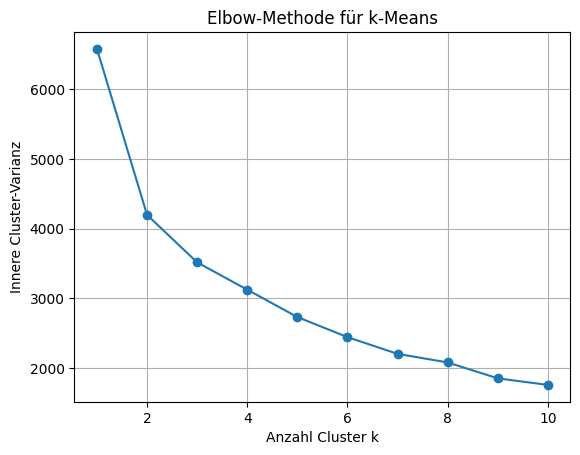

In [49]:
# Berechnung Anzahl von K durck Elbow-Methode:
in_cluster_varianz = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    in_cluster_varianz.append(kmeans.inertia_)

plt.plot(k_range, in_cluster_varianz, marker='o')
plt.xlabel('Anzahl Cluster k')
plt.ylabel('Innere Cluster-Varianz')
plt.title('Elbow-Methode für k-Means')
plt.grid()
plt.show()


In [50]:
# Laut Diagramm kann man k auswählen: 3 - 5
# Modell mit k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

### EM Clustering

Benutzen Sie das EM-Clustering, um die Daten zu clustern. Bestimmen Sie eine geeignete Clusteranzahl $k$. Benutzen Sie Ihr Wissen über die Daten, Visualisierungen und BIC, um eine geeignete Anzahl Cluster zu bestimmen.

In [51]:
#  EM-Clustering:
gmm = GaussianMixture(n_components=3, random_state=42)# gmm = Gaussian Mixture Model
df['gmm_cluster'] = gmm.fit_predict(df_scaled)

### DBSCAN

Benutzen Sie DBSCAN, um die Daten zu clustern. Bestimmen Sie geeignete Werte für $\epsilon$ und $minPts$. Benutzen Sie Ihr Wissen über die Daten und Visualisierungen, um geeignete Werte zu finden.

In [52]:
# DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(df_scaled)

### SLINK

Benutzen Sie den SLINK-Algorithmus, um die Daten zu clustern. Bestimmen Sie mithilfe eines Dendrogramms einen geeigneten Grenzwert für die Level.

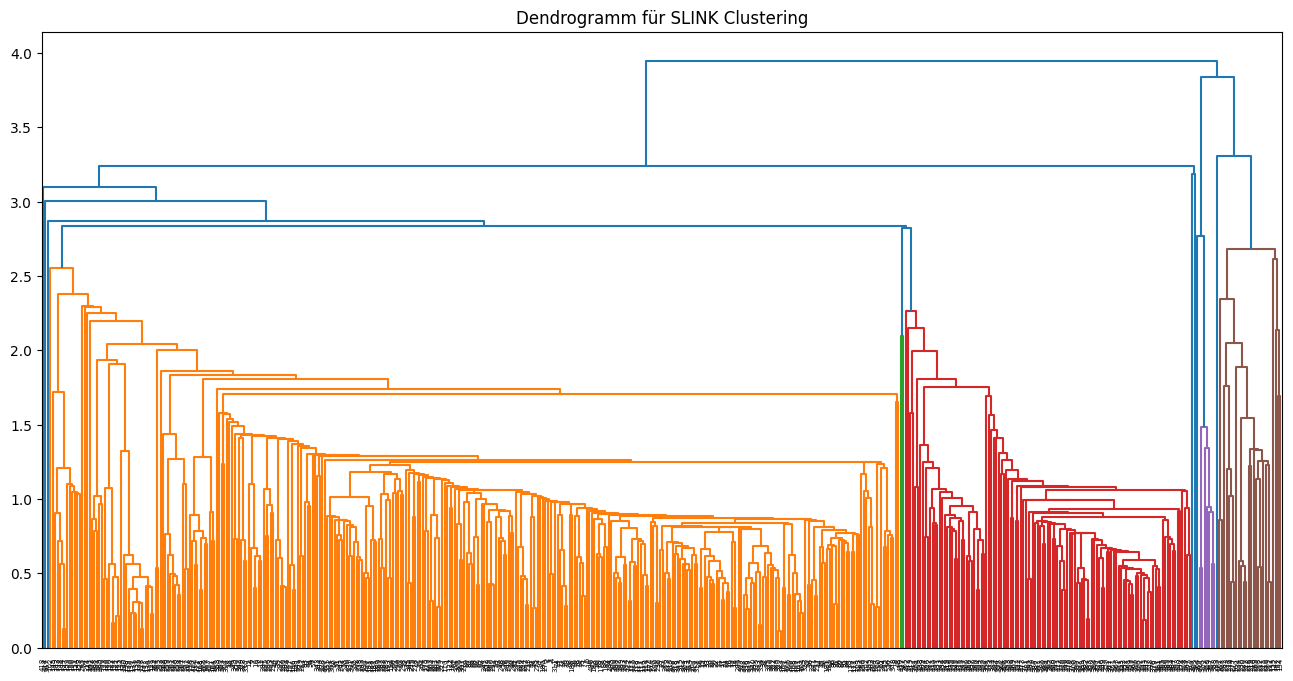

In [54]:
#Hierarchisches Clustering (SLINK)
l_matrix = linkage(df_scaled, method='single')
plt.figure(figsize=(16, 8))
dendrogram(l_matrix)
plt.title('Dendrogramm für SLINK Clustering')
plt.show()

df['slink_cluster'] = fcluster(l_matrix, t=3, criterion='maxclust') # Führt SLINK Clustering durch und weist jedem Datenpunkt im DataFrame 'df' eine Cluster-ID zu, wobei maximal 3 Cluster gebildet werden.

### Vergleichen Sie die Ergebnisse

Vergleichen Sie die Ergebnisse der Algorithmen. Welche Unterschiede gibt es zum Beispiel in der Clusteranzahl und der Form der Cluster? Identifizieren Sie eventuelle Probleme der Algorithmen. 

1. K-Means und GMM gruppieren Punkte basierend auf Mittelwerten und Wahrscheinlichkeiten.
2. DBSCAN erkennt Cluster basierend auf Dichte, sodass er bei stark verteilten Daten mehr Ausreißer erkennt.
3. Slink ordnet Cluster basierend auf der Ähnlichkeit zwischen den Punkten und kann mehr feingranulare Strukturen finden.

In diesem Fall gibt es eine Cluster-ID (1) bei Slink.  Das bedeutet, dass Slink die Daten anders gruppiert als die anderen Algorithmen. Eine weitere Visualisierung als scatter bestätigt dies ebenfalls.

In [55]:
print(df[['kmeans_cluster', 'gmm_cluster', 'dbscan_cluster', 'slink_cluster']].head())


   kmeans_cluster  gmm_cluster  dbscan_cluster  slink_cluster
0               0            0               0              1
1               0            0               0              1
2               0            0               0              1
3               0            0               0              1
4               0            0               0              1


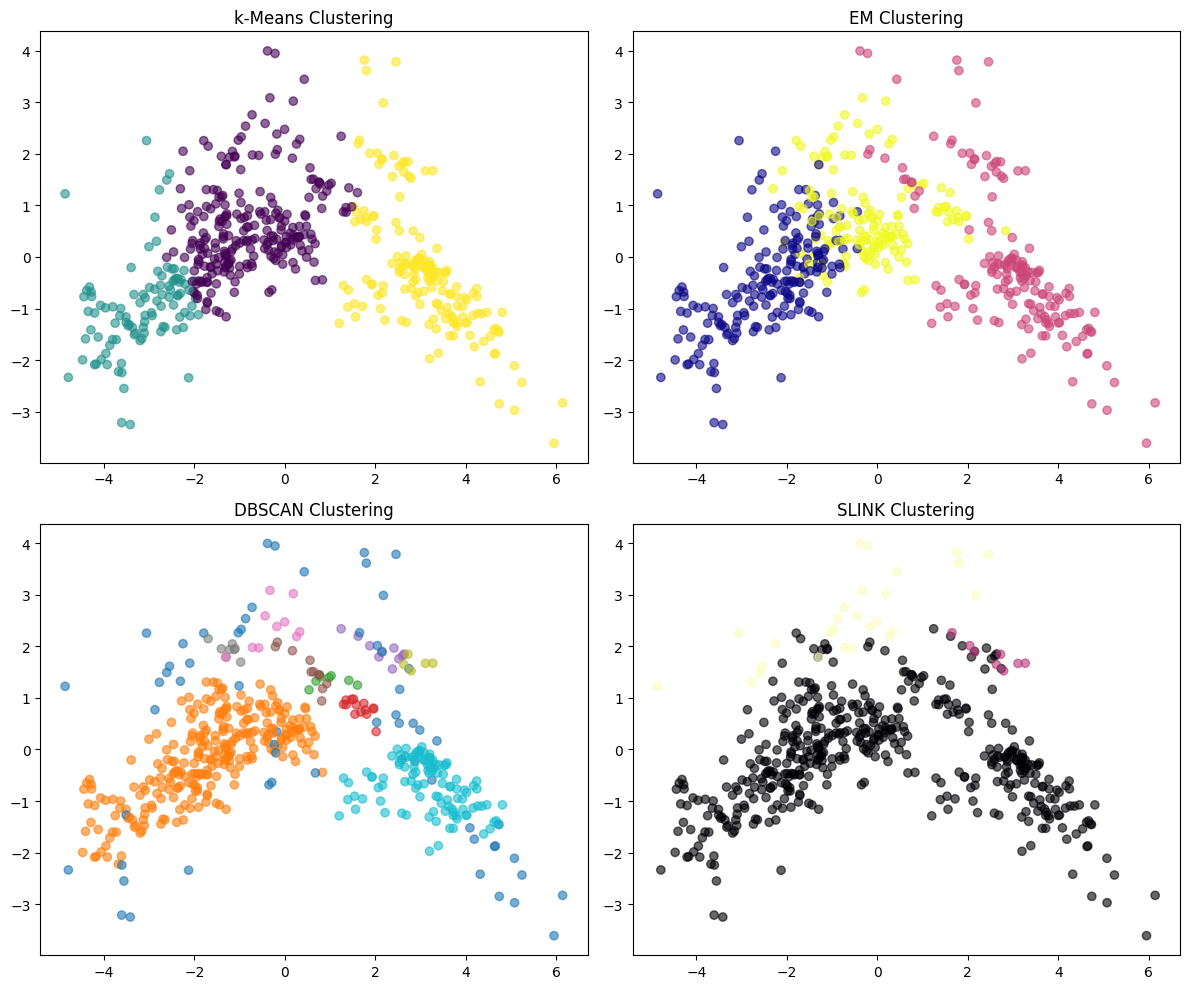

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# k-Means
axes[0, 0].scatter(df_pca[:, 0], df_pca[:, 1], c=df['kmeans_cluster'], cmap='viridis', alpha=0.6)
axes[0, 0].set_title("k-Means Clustering")

# EM (GMM)
axes[0, 1].scatter(df_pca[:, 0], df_pca[:, 1], c=df['gmm_cluster'], cmap='plasma', alpha=0.6)
axes[0, 1].set_title("EM Clustering")

# DBSCAN
axes[1, 0].scatter(df_pca[:, 0], df_pca[:, 1], c=df['dbscan_cluster'], cmap='tab10', alpha=0.6)
axes[1, 0].set_title("DBSCAN Clustering")

# Hierarchisches Clustering (SLINK)
axes[1, 1].scatter(df_pca[:, 0], df_pca[:, 1], c=df['slink_cluster'], cmap='magma', alpha=0.6)
axes[1, 1].set_title("SLINK Clustering")


plt.tight_layout()
plt.show()


Unterschied:
1. Clusteranzahl: K-Means und GMM haben 3 Cluster, DBSCAN und SLINK variieren.
2. Clusterform: K-Means hat runde Cluster, GMM elliptische, DBSCAN unregelmäßige und SLINK flexible Formen.

Probleme: K-Means und GMM sind empfindlich gegenüber unregelmäßigen Formen, DBSCAN ist sensitiv gegenüber den Dichteparametern und SLINK kann Ausreißer und Rauschen schlecht handhaben.